# TP Semanal 4

## Consignas:

<img src="consignas.png">

## Resolución:

In [1]:
from IPython.display import IFrame

IFrame(src='TS4.pdf', width=700, height=600)

## Simulaciones:

### Python

Aca me armé algunas funciones útiles que me van a servir también para las proximas tareas semanales

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

"""
Te crea tf butter normalizada
"""
def butterworth(n):
    # Crear los polos del filtro Butterworth
    num,den = signal.butter(n, 1, btype='lowpass', analog=True, output='ba')
    tf = signal.TransferFunction(num, den)
    return tf



"""
Te crea la tf de un filtro maxima planicidad a partir de un butter
"""
def butter2maxflat(tf_butter, epsilon):
    # Obtener los polos y ganancia del filtro Butterworth
    sys = tf_butter.to_zpk()
    poles = sys.poles
    zeros = sys.zeros
    k = sys.gain/(epsilon**len(poles))
    
    newPoles = []
    for p in poles:
        r = p.real/epsilon
        i = p.imag/epsilon*(0+1j)
        newPole = r+i
        newPoles.append(newPole)
    
    num,den = signal.zpk2tf(zeros, newPoles, k)
    tf = signal.TransferFunction(num, den)
    return tf

"""
Le passas un filtro PB y te aplica el kernell 1/$ para pasar a PA
"""
def kernellPb2Pa(tf):
    denPb = tf.den
    n = len(denPb)
    numPa = [1]
    for i in range(0,n-1):
        numPa.append(0)
    aux = denPb.tolist()
    aux.reverse()
    denPa = []
    for coef in aux:
        denPa.append(coef/denPb[n-1])
    tfPa = signal.TransferFunction(numPa, denPa)
    return tfPa


"""
Te grafica PZMap, Modulo y Fase
"""
def plot_tf(tf):
    #Imprimo transferencia
    print(tf.num)
    print("----------------")
    print(tf.den)
    #print("Polos: ", tf.to_zpk().poles)
    #print("Ceros: ", tf.to_zpk().zeros)
    #print("K: ", tf.to_zpk().gain)
    
    # Obtener la respuesta en frecuencia
    w, mag, phase = signal.bode(tf)

    # Graficar la respuesta en módulo
    plt.figure()
    plt.semilogx(w, mag)
    plt.xlabel('Frecuencia [rad/s]')
    plt.ylabel('Magnitud [dB]')
    plt.title('Respuesta en Módulo')
    plt.grid(True)

    # Graficar la respuesta en fase
    plt.figure()
    plt.semilogx(w, phase)
    plt.xlabel('Frecuencia [rad/s]')
    plt.ylabel('Fase [grados]')
    plt.title('Respuesta en Fase')
    plt.grid(True)

    # Obtener los polos y ceros
    poles = tf.poles
    zeros = tf.zeros

    # Configuración del gráfico
    fig, ax = plt.subplots()
    ax.set_aspect('equal')  # Proporción de ejes igual para una circunferencia circular
    ax.axhline(0, color='gray', lw=0.5)  # Eje horizontal
    ax.axvline(0, color='gray', lw=0.5)  # Eje vertical
    ax.grid(True, linestyle='--', alpha=0.5)  # Activar la grilla
    
    # Traza la circunferencia unitaria
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    ax.plot(x, y, color='gray', linewidth=0.5, linestyle='--')
    
    # Traza los polos y ceros
    ax.plot(np.real(poles), np.imag(poles), 'x')
    ax.plot(np.real(zeros), np.imag(zeros), 'o')
    
    # Etiquetas y leyenda
    ax.set_xlabel('Parte real')
    ax.set_ylabel('Parte imaginaria')
    ax.set_title('Diagrama de polos y ceros', pad=10, loc='center')
    ax.legend()
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

Aca le paso los datos para un filtro PA, a las que le va a aplicar el kernell 1/s para diseñarlo en topologia PB y luego volver a una PA

In [3]:
#Datos plantilla PA
alfaMax = 1
alfaMin = 30
ws = 10*10**3
wp = 40*10**3

#Normalizo en frecuencia
normaW = wp
wp /= normaW
ws /= normaW
print("Normalizo en freq:")
print("ws = ", ws)
print("wp = ", wp)
print("")

#Aplico kernell a la plantilla
wp_pb = wp**-1
ws_pb = ws**-1
print("Aplico kernell:")
print("ws_pb = ", ws_pb)
print("wp_pb = ", wp_pb)
print("")

#Diseño filtro PB
epsilon = np.sqrt(10**(alfaMax/10)-1)
alfaAux = 0
n=0
while alfaAux < alfaMin:
    n+=1
    alfaAux = 10*np.log10(1+epsilon**2*ws_pb**(2*n))
print("Diseño filtro pasa bajos:")
print("epsilon = ", epsilon)
print("n = ", n)

Normalizo en freq:
ws =  0.25
wp =  1.0

Aplico kernell:
ws_pb =  4.0
wp_pb =  1.0

Diseño filtro pasa bajos:
epsilon =  0.5088471399095875
n =  3


Aca normaliza a filtro de Butter maxima planicidad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Diseño de filtro PB
[1.]
----------------
[1. 2. 2. 1.]


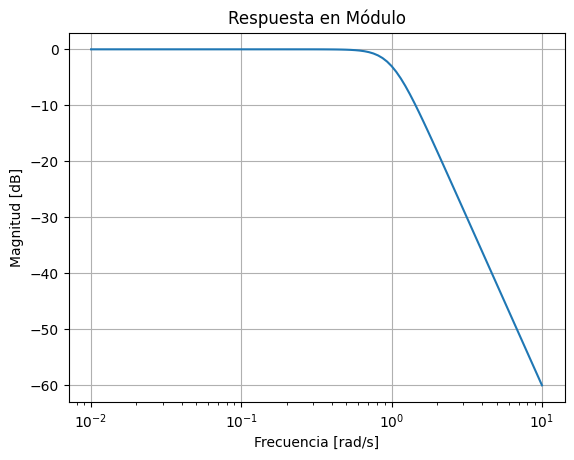

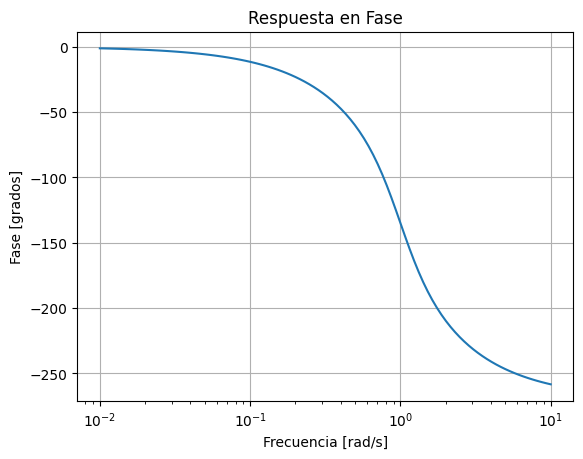

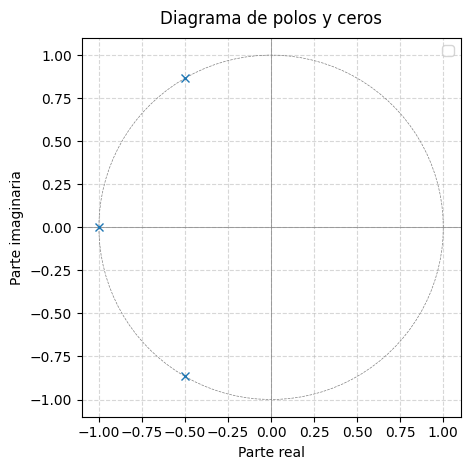

In [4]:
#Formo transferencia Butter
print("Diseño de filtro PB")
filtroButterPb = butterworth(n)
plot_tf(filtroButterPb)

Aca desnormaliza el filtro de Butter para el Epsilon que habiamos calculado maxima planicidad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Desnormalizo butter
[7.58993378]
----------------
[1.         3.93045346 7.72423219 7.58993378]


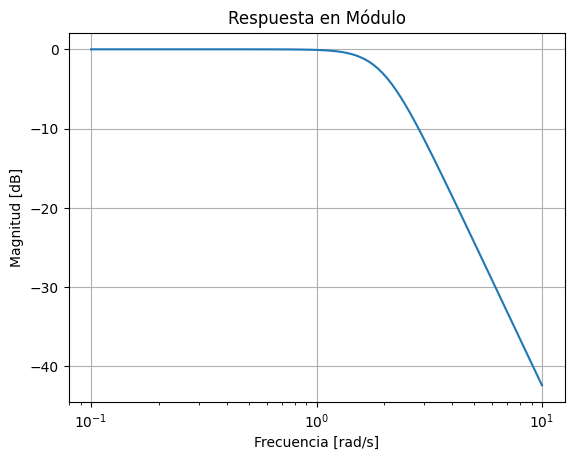

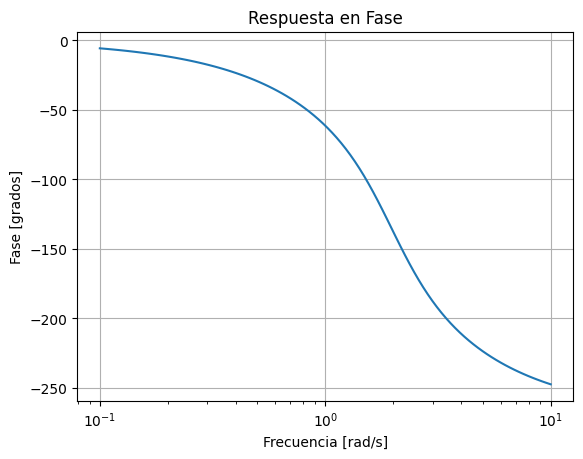

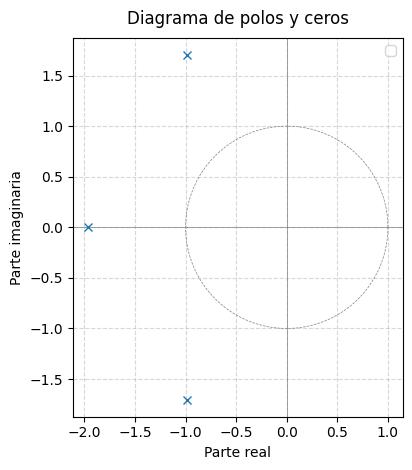

In [5]:
print("Desnormalizo butter")
filtroMaxFlatPb = butter2maxflat(filtroButterPb, epsilon)
plot_tf(filtroMaxFlatPb)
print("")


Aca le aplica el kernell a la transferencia para pasar de PB a PA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Vuelvo a topología PA
[1. 0. 0. 0.]
----------------
[1.         1.01769428 0.51785082 0.13175346]


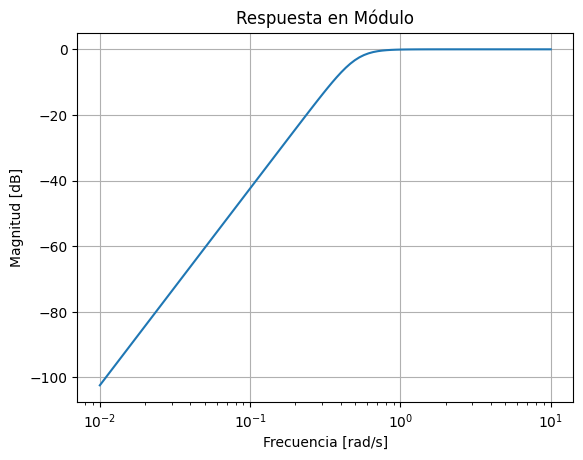

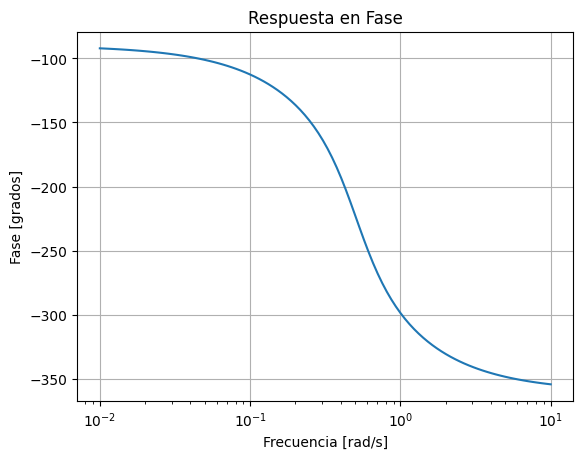

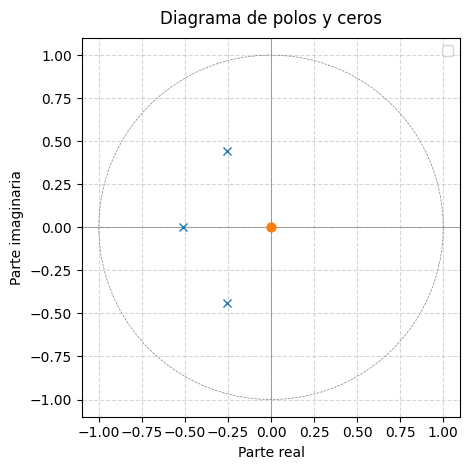

In [6]:

#Vuelvo a topología PA
print("Vuelvo a topología PA")
tf_Pa = kernellPb2Pa(filtroMaxFlatPb)
plot_tf(tf_Pa )
print("")

Como podemos ver esta ultima transferencia esta normalizada en freciencia pero ya le quitamos la norma de Butter de encima. Si lo comparamos con los calculos es distinta ya que ahi lo que hicimos fue aplicar el kernell directamente a la transferencia normalizada de Butter y luego desnormalizamos a nivel componentes. Sin embargo tiene el comportamiento esperado

### LTSpice
<img src="circuitoSpice.png">
<img src="GraficoSpice.png">

### Observaciones
Vemos que si implementamos el diseño con un inductor, se comporta tal cual los cálculos.
Sin embargo, cuando lo hacemos con el GIC vemos que el comportamiento no es exactamente el esperado.
Creo que esto es así ya que hay un error de redondeo en el GIC además de que el operacional no es 100% ideal y por ello a altas frecuencias se deforma.

Cabe destacar que probé en poner el capacitor en Z2 y Z4 y de ambas formas el simulador obtiene la misma respuesta